In [3]:
import numpy as np
from matplotlib import pyplot as plt
from tifffile import imread, imsave
from glob import glob

In [103]:
def processFiles(path='*.tif', target = './',
                 cX=None, cY=None, 
                 minX=None, maxX=None, 
                 minY=None, maxY=None, 
                 width=None, height=None, 
                 vmin=None, vmax=None,
                 perMin=0, perMax=100,
                 cmap='magma'
                ):
    files = glob(path)
    cropShape = None
    for f in files:
        print(f)
        img = imread(f)
        crop, minX, maxX, minY, maxY = cropImg(img, cX, cY,
                                               minX, maxX,
                                               minY, maxY,
                                               width, height,
                                               getMiMa=True)
        if cropShape is None:
            cropShape = crop.shape
        else:
            assert cropShape == crop.shape
        
            
        if vmin is not None:
            vmin_=vmin
        else:            
            vmin_ = np.percentile(crop, perMin)
            
        if vmax is not None:
            vmax_=vmax
        else:            
            vmax_ = np.percentile(crop, perMax)
        
        
        plt.imshow(crop, vmin=vmin_, vmax=vmax_, cmap=cmap)
        plt.show()
        postFix='_crop_minX'+str(minX)  +'_maxX'+str(maxX)
        postFix+= '_minY'+str(minY) +'_maxY'+str(maxY)
        #postFix+= '_vmin'+str(round(vmin_))+ '_vmax'+str(round(vmax_))
        postFix+='.png'
        outPath=target+(f.split('/')[-1]).replace('.tif', postFix)
        print('op',outPath)
        plt.imsave(outPath, crop, vmin=vmin_, vmax=vmax_, cmap=cmap)
    

In [74]:
def getMinMax(imgShape, cX=None, cY=None, minX=None, maxX=None, minY=None, maxY=None, width=None, height=None):
    imSizeX=imgShape[-1]
    imSizeY=imgShape[-2]
    
    if height is None:
        assert maxY is not None
        assert minY is not None
        assert maxY > minY
        assert maxY < imageSizeY
        assert minY >= 0
        height = maxY - minY
    assert height >= 0
    
    if minY is None:
        assert (cY is not None) or (maxY is not None) 
        if cY is not None:
            minY= cY-height//2
        else:
            minY= maxY-height
    maxY = minY + height
            
    if width is None:
        assert maxX is not None
        assert minX is not None
        assert maxX > minX
        assert maxX < imageSizeX
        assert minX >= 0
        width = maxX - minX
    assert width >= 0

    if minX is None:
        assert (cX is not None) or (maxX is not None) 
        if cX is not None:
            minX= cX-width//2
        else:
            minX= maxX-width
    maxX = minX + width
    
    maxY = min(imSizeY-1, maxY)    
    maxX = min(imSizeX-1, maxX)    
    minY = min(imSizeY-1, minY)    
    minX = min(imSizeX-1, minX)    
    
    maxY = max(0, maxY)    
    maxX = max(0, maxX)    
    minY = max(0, minY)    
    minX = max(0, minX)    
    
    return minX, maxX, minY, maxY



def cropImg(img, cX=None, cY=None,
            minX=None, maxX=None,
            minY=None, maxY=None,
            width=None, height=None,
            getMiMa=False):
    minX, maxX, minY, maxY = getMinMax(img.shape, cX, cY, minX, maxX, minY, maxY, width, height)
    print('minX:',minX, 'maxX:', maxX, 'minY:', minY,'maxY:', maxY)
    if getMiMa:
        return img[...,minY:maxY, minX:maxX], minX, maxX, minY, maxY
    else:
        return img[...,minY:maxY, minX:maxX]

In [53]:
img = np.zeros((100,100))
cr = crop(img,maxX=20,maxY=31,width=10, height=11)
cr.shape

minX: 10 maxX: 20 minY: 20 maxY: 31


(11, 10)

../../experiments/fairSim/2020-07-27/Zeiss/recos/n-1-0p5.tif
minX: 200 maxX: 350 minY: 300 maxY: 450


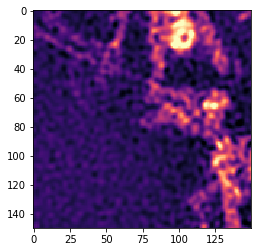

op ../../experiments/fairSim/2020-07-27/Zeiss/recos/autoCrops/n-1-0p5_crop_minX200_maxX350_minY300_maxY450.png
../../experiments/fairSim/2020-07-27/Zeiss/recos/n-1-0p05.tif
minX: 200 maxX: 350 minY: 300 maxY: 450


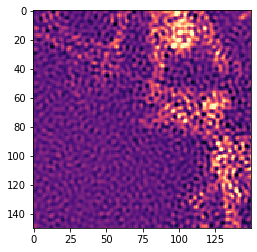

op ../../experiments/fairSim/2020-07-27/Zeiss/recos/autoCrops/n-1-0p05_crop_minX200_maxX350_minY300_maxY450.png
../../experiments/fairSim/2020-07-27/Zeiss/recos/n-1-DnD-0p05.tif
minX: 200 maxX: 350 minY: 300 maxY: 450


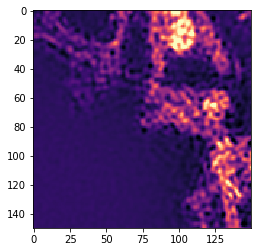

op ../../experiments/fairSim/2020-07-27/Zeiss/recos/autoCrops/n-1-DnD-0p05_crop_minX200_maxX350_minY300_maxY450.png
../../experiments/fairSim/2020-07-27/Zeiss/recos/n-1-N2V-0p5.tif
minX: 200 maxX: 350 minY: 300 maxY: 450


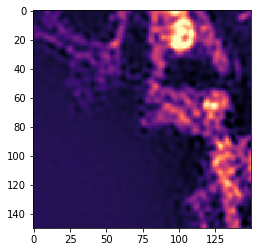

op ../../experiments/fairSim/2020-07-27/Zeiss/recos/autoCrops/n-1-N2V-0p5_crop_minX200_maxX350_minY300_maxY450.png
../../experiments/fairSim/2020-07-27/Zeiss/recos/n-1-DnD-0p5.tif
minX: 200 maxX: 350 minY: 300 maxY: 450


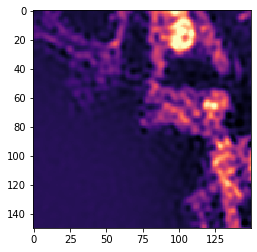

op ../../experiments/fairSim/2020-07-27/Zeiss/recos/autoCrops/n-1-DnD-0p5_crop_minX200_maxX350_minY300_maxY450.png
../../experiments/fairSim/2020-07-27/Zeiss/recos/n-1-N2V-0p4.tif
minX: 200 maxX: 350 minY: 300 maxY: 450


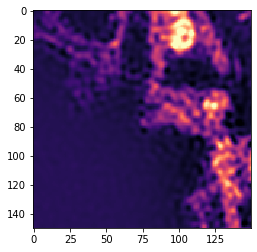

op ../../experiments/fairSim/2020-07-27/Zeiss/recos/autoCrops/n-1-N2V-0p4_crop_minX200_maxX350_minY300_maxY450.png
../../experiments/fairSim/2020-07-27/Zeiss/recos/n-1-DnD-0p4.tif
minX: 200 maxX: 350 minY: 300 maxY: 450


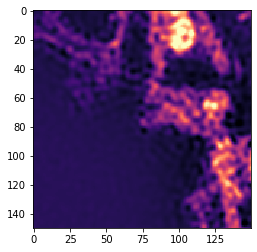

op ../../experiments/fairSim/2020-07-27/Zeiss/recos/autoCrops/n-1-DnD-0p4_crop_minX200_maxX350_minY300_maxY450.png
../../experiments/fairSim/2020-07-27/Zeiss/recos/n-1-DnD-0p2.tif
minX: 200 maxX: 350 minY: 300 maxY: 450


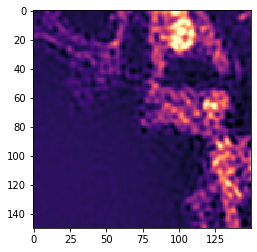

op ../../experiments/fairSim/2020-07-27/Zeiss/recos/autoCrops/n-1-DnD-0p2_crop_minX200_maxX350_minY300_maxY450.png
../../experiments/fairSim/2020-07-27/Zeiss/recos/n-1-N2V-0p2.tif
minX: 200 maxX: 350 minY: 300 maxY: 450


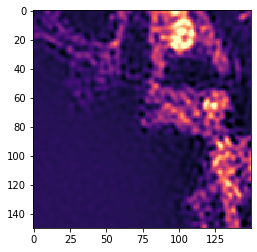

op ../../experiments/fairSim/2020-07-27/Zeiss/recos/autoCrops/n-1-N2V-0p2_crop_minX200_maxX350_minY300_maxY450.png
../../experiments/fairSim/2020-07-27/Zeiss/recos/n-1-N2V-0p1.tif
minX: 200 maxX: 350 minY: 300 maxY: 450


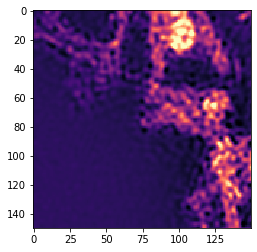

op ../../experiments/fairSim/2020-07-27/Zeiss/recos/autoCrops/n-1-N2V-0p1_crop_minX200_maxX350_minY300_maxY450.png
../../experiments/fairSim/2020-07-27/Zeiss/recos/n-1-DnD-0p1.tif
minX: 200 maxX: 350 minY: 300 maxY: 450


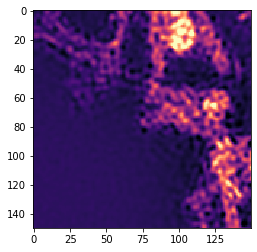

op ../../experiments/fairSim/2020-07-27/Zeiss/recos/autoCrops/n-1-DnD-0p1_crop_minX200_maxX350_minY300_maxY450.png
../../experiments/fairSim/2020-07-27/Zeiss/recos/n-1-0p2.tif
minX: 200 maxX: 350 minY: 300 maxY: 450


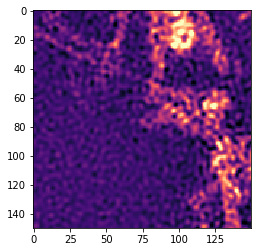

op ../../experiments/fairSim/2020-07-27/Zeiss/recos/autoCrops/n-1-0p2_crop_minX200_maxX350_minY300_maxY450.png
../../experiments/fairSim/2020-07-27/Zeiss/recos/n-1-0p1.tif
minX: 200 maxX: 350 minY: 300 maxY: 450


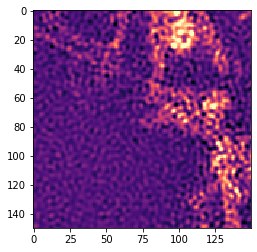

op ../../experiments/fairSim/2020-07-27/Zeiss/recos/autoCrops/n-1-0p1_crop_minX200_maxX350_minY300_maxY450.png
../../experiments/fairSim/2020-07-27/Zeiss/recos/n-1-0p4.tif
minX: 200 maxX: 350 minY: 300 maxY: 450


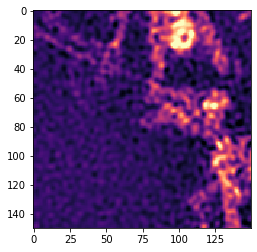

op ../../experiments/fairSim/2020-07-27/Zeiss/recos/autoCrops/n-1-0p4_crop_minX200_maxX350_minY300_maxY450.png
../../experiments/fairSim/2020-07-27/Zeiss/recos/n-1-N2V-0p05.tif
minX: 200 maxX: 350 minY: 300 maxY: 450


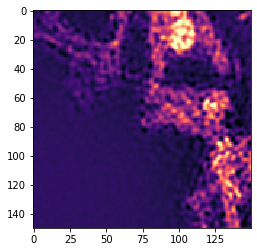

op ../../experiments/fairSim/2020-07-27/Zeiss/recos/autoCrops/n-1-N2V-0p05_crop_minX200_maxX350_minY300_maxY450.png


In [106]:
processFiles(path='../../experiments/fairSim/2020-07-27/Zeiss/recos/n-1*.tif',
             target = '../../experiments/fairSim/2020-07-27/Zeiss/recos/autoCrops/',
             minX=200,minY=300,width=150, height=150,
             perMin= 0.1, perMax=99.5)
